<a href="https://colab.research.google.com/github/ZPavlo/ML_projects/blob/master/object_detecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH = "/content/gdrive/My Drive"

In [0]:
import os 
from torchvision.datasets.voc import VOCDetection
import cv2
import numpy as np

class MyVOCDetection(VOCDetection):

    def __init__(self, root, image_set, download=False, transforms=None):
      super(MyVOCDetection, self).__init__(root, image_set=image_set, download=download, transforms=transforms)
      self.dim = (300, 300)

    def __getitem__(self, index):
      img, target = super().__getitem__(index)
      img = np.array(img)

      annotation = target["annotation"]
      boxes_dict = annotation["object"]
      if isinstance(boxes_dict, dict):
        boxes_dict = [boxes_dict]
      size = annotation["size"]
      size = (int(size["depth"]), int(size["height"]), int(size["width"]))
      
      boxes = []
      for box in boxes_dict:
          boxes.append([int(box["bndbox"]["xmin"]), int(box["bndbox"]["ymin"]),
                        int(box["bndbox"]["xmax"]), int(box["bndbox"]["ymax"])])
      boxes = np.array(boxes)
      if self.transform is not None:
            img, target = self.transforms(img, target)

      img = cv2.resize(img, self.dim, interpolation = cv2.INTER_AREA)
      
      boxes[:, 0] = boxes[:, 0] * (self.dim[0] / float(size[2]))
      boxes[:, 1] = boxes[:, 1] * (self.dim[1] / float(size[1]))
      boxes[:, 2] = boxes[:, 2] * (self.dim[0] / float(size[2]))
      boxes[:, 3] = boxes[:, 3] * (self.dim[1] / float(size[1]))
      
      return (img.transpose(2, 0, 1), 
              size, 
              boxes)

ROOT_PATH = os.path.join(PATH, "datasets")

train_dataset = MyVOCDetection(ROOT_PATH, image_set="train", download=False)
val_dataset = MyVOCDetection(ROOT_PATH, image_set="val", download=False)

In [0]:
BATCH_SIZE = 8

In [0]:
from torch.utils.data import DataLoader

def my_collate_fn(samples):

    images = []
    sizes = []
    boxes_batch = []

    for (img, size, boxes) in samples:
        images.append(img)
        boxes_batch.append(boxes)
        sizes.append(size)

    images = np.array(images)

    return {"img": images,
            "boxes": boxes_batch,
            "size": sizes,
            }

train_load = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, 
                        num_workers=0, pin_memory=True, 
                        collate_fn=my_collate_fn)
val_load = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                        num_workers=0, pin_memory=True)

In [0]:
import torchvision.utils as utils
import torch

# batch = next(iter(train_load))

def draph_boxes(image, objs):

    image = np.transpose(image, (1, 2, 0))

    for box in objs:
        # box = box.astype("int")
        print(image.dtype)
        print(box.shape)
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255,0,0), 2)

    return image

imgs = torch.from_numpy(batch['img'])
new_imgs = []

for i, img in enumerate(imgs):
    new_imgs.append(draph_boxes(img, batch["boxes"][i]))

grid = utils.make_grid(new_imgs, 4, padding=2)
ngrid = grid.numpy()

plt.figure(dpi=120)
plt.imshow(np.transpose(ngrid, (1, 2, 0)))

torch.uint8
(4,)


TypeError: ignored

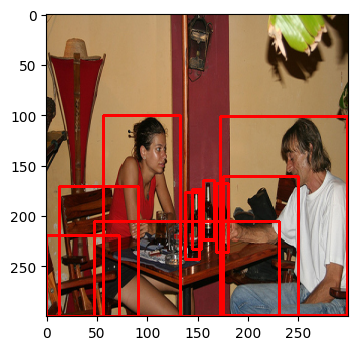

In [0]:
import matplotlib.pyplot as plt

def draph_boxes(image, objs):
  
  for box in objs:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255,0,0), 2)
  return image

plt.figure(dpi=100)
plt.imshow(draph_boxes(batch[0], batch[2]))

In [0]:
img

AttributeError: ignored

In [0]:
annot = batch[1]["annotation"]

In [0]:
annot.keys()

dict_keys(['filename', 'folder', 'object', 'segmented', 'size', 'source'])

In [0]:
annot

{'filename': '2010_002870.jpg',
 'folder': 'VOC2012',
 'object': [{'bndbox': {'xmax': '335',
    'xmin': '125',
    'ymax': '411',
    'ymin': '228'},
   'difficult': '0',
   'name': 'chair',
   'occluded': '0',
   'pose': 'Left',
   'truncated': '0'},
  {'bndbox': {'xmax': '335', 'xmin': '210', 'ymax': '248', 'ymin': '171'},
   'difficult': '0',
   'name': 'chair',
   'occluded': '0',
   'pose': 'Left',
   'truncated': '0'},
  {'bndbox': {'xmax': '335', 'xmin': '262', 'ymax': '182', 'ymin': '131'},
   'difficult': '0',
   'name': 'chair',
   'occluded': '0',
   'pose': 'Left',
   'truncated': '0'},
  {'bndbox': {'xmax': '335', 'xmin': '269', 'ymax': '164', 'ymin': '126'},
   'difficult': '0',
   'name': 'chair',
   'occluded': '1',
   'pose': 'Left',
   'truncated': '0'}],
 'segmented': '1',
 'size': {'depth': '3', 'height': '500', 'width': '335'},
 'source': {'annotation': 'PASCAL VOC2010',
  'database': 'The VOC2010 Database',
  'image': 'flickr'}}